**Business Problem / Objective**

Our aim is classify customers who have subscribed for Fixed Deposit(FD) and predict the customers who will take the FD based on the given attributes of the customer.

# Understanding the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
masterData = pd.read_csv('bank-full.csv',sep=';') # Read the data and display the data for integrity
masterData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
masterData.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* There are 17 columns and no null values 
* There are 7 features of integer type and 10 features of object type basically they are all categorical data
* While first 16 columns are independent variables and we are to predict the 17th column

In [4]:
# temp = masterData.select_dtypes(include='object').columns
# for x in temp:
#     masterData[x] = masterData[x].astype('category')

masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Checking the key statistics of the numeric data 

In [5]:
masterData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking the unique values in each columns

In [6]:
# Display the categories with unique values less than 10 else show the count of unique values

print('\n \033[7m Unique Values and their Categories \033[0m\n')
for x in masterData.columns:
    if len(np.unique(masterData[x])) <= 10:
        print(f'Number of unique vals in {x:<10} - {len(np.unique(masterData[x])):<4}  :- Categories are ',np.unique(masterData[x]))
    else:
        print(f'Number of unique vals in {x:<10} - {len(np.unique(masterData[x])):<4}')


  Unique Values and their Categories 

Number of unique vals in age        - 77  
Number of unique vals in job        - 12  
Number of unique vals in marital    - 3     :- Categories are  ['divorced' 'married' 'single']
Number of unique vals in education  - 4     :- Categories are  ['primary' 'secondary' 'tertiary' 'unknown']
Number of unique vals in default    - 2     :- Categories are  ['no' 'yes']
Number of unique vals in balance    - 7168
Number of unique vals in housing    - 2     :- Categories are  ['no' 'yes']
Number of unique vals in loan       - 2     :- Categories are  ['no' 'yes']
Number of unique vals in contact    - 3     :- Categories are  ['cellular' 'telephone' 'unknown']
Number of unique vals in day        - 31  
Number of unique vals in month      - 12  
Number of unique vals in duration   - 1573
Number of unique vals in campaign   - 48  
Number of unique vals in pdays      - 559 
Number of unique vals in previous   - 41  
Number of unique vals in poutcome   - 4     

### Using the count plot to check the relation of cateforical variable with our Dependent variable

    ***First check the distribution of our Dependent Variable

<AxesSubplot:xlabel='y', ylabel='count'>

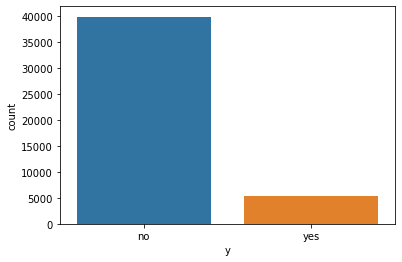

In [7]:
sns.countplot(x=masterData['y'], data = masterData)

***This is a very biased data out of 45211 number of observations approximately only 5000 are yes which makes the probability of such occurance 5000 / 45211 = 11% of the total data set is in favour of the interested event. it is very difficlut to build a efficient model in this scenario, without modifying the threshold in the model. which is out of scope for now.***

### </n>Let us check the correlation of our categorical variable with  the dependent variable.</n>

In [8]:
# Cat_Var = [feature for feature in masterData.columns if masterData[feature].dtypes == 'O']
Cat_Var = masterData.select_dtypes(include='category').columns

for feature in Cat_Var:
    plt.figure(figsize=(8,2.5))
    sns.countplot(x=masterData[feature], data=masterData, hue='y')
    plt.title(f'Distribution of Fixed Deposit Status for categories in "{feature}"',fontsize=14)
    plt.xticks(rotation = 90)
    plt.show()

***There is a reasonalbe distribution of Fixed Deposit status `'Y' and 'N'` among all categorical variables. let us see how to use them in prediction.***

### Coverting categorical variables into numerical using get_dummies

For machine learning algorithm it is important to feed the data in number format as computers can not process text. We can convert all categorical values in numeric form just by labeling them with numbers. We shall use Get_dummies method to label the data with numbers. 

**`get_dummies method`**

Pandas get_dummies method will automatically create columns for each categoric label and fill it with 0 or 1 to represent true or false.

first let us segregate dependent/predicted feature from rest of the data. Then we can apply get_dummies on rest of the data and create dummy features. 

We want to keep all categories in the single column for the predicted features. We can manually label the data or label them using oneHot coding method in SKlearn library.

In [9]:
# Segregating predicted variable from predictor valriables.

EDA_Data = masterData.copy(deep=True) # creating a copy of EDA
print(EDA_Data.shape)
EDA_Data.drop('y',axis=1,inplace = True) #segregating dependent and independent variables

(45211, 17)


### one hot coding for all independent variables

In [10]:
edaData = pd.get_dummies(EDA_Data)
edaData.shape

(45211, 51)

As we can see after applying get_dummies on our dataset the number of columns increased from 17 features to 51 features.

### Converting y column into integer type - 1 = 'no' , 0 = 'yes'

In [11]:
y = masterData['y'].copy(deep=True)
y = y.map({'no':1,'yes':0})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [12]:
print(y.value_counts(),'\n')
print('Before typecasting datatype :', y.dtypes)
y = y.astype(int) # Changing our 'y' column from object to int.
print('After typecasting datatype :', y.dtypes)

1    39922
0     5289
Name: y, dtype: int64 

Before typecasting datatype : int64
After typecasting datatype : int32


Now our data is ready for feeding into the algorithm as required by the SKlearn library. As required we have segregated the DATA into "X" and "y", X being independent features which act as predictors and y being dependent feature, which will be predicted. Let us check the X data for now. 

In [13]:
edaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

### Feature selection using entropy  - information gain.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10) # fitting the feature section function using 
dt.fit(edaData,y)                                                               # entropy - information gain.

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

***Creating the two lists with feature name (fi_Col) and feature importance score (fimp). So that we can sort the feature importance score. Then we can select the features with highest importance score / information gain score***

In [16]:
fi_Col = []
fimp = []
for i,column in enumerate(edaData):
    print('The feature importance for {:<20}  : {}'.format(column, dt.feature_importances_[i]))
    fi_Col.append(column)
    fimp.append(dt.feature_importances_[i])

The feature importance for age                   : 0.01957928917178551
The feature importance for balance               : 0.02073061732012218
The feature importance for day                   : 0.047451982007638345
The feature importance for duration              : 0.4102147390614419
The feature importance for campaign              : 0.011042484016632862
The feature importance for pdays                 : 0.03831795189431376
The feature importance for previous              : 0.005048387969711429
The feature importance for job_admin.            : 0.0021001434054631766
The feature importance for job_blue-collar       : 0.0012781681156430887
The feature importance for job_entrepreneur      : 0.0
The feature importance for job_housemaid         : 0.0005408791116081995
The feature importance for job_management        : 0.0018238854573468981
The feature importance for job_retired           : 0.00024309334935137205
The feature importance for job_self-employed     : 0.00040562003238544945
The fe

In [17]:
# Creating the dataframe with feature importance
# print('\n \033[7m FEATURE IMPORTANCE TABLE \033[0m \n')
fimp_df = pd.DataFrame({'Feature':fi_Col,'FeatureImp':fimp}) ## creating the data frame using the two lists

# Sorting the Feature importance table 
print('\n \033[7m SORTED FEATURE IMPORTANCE TABLE \033[0m')
fimp_df = fimp_df.sort_values("FeatureImp", ascending=False).reset_index() ## sorting the dataframe for Feature imp column
fimp_df.head()


  SORTED FEATURE IMPORTANCE TABLE 


,index,Feature,FeatureImp
0,3,duration,0.410215
1,49,poutcome_success,0.174092
2,34,contact_unknown,0.066118
3,2,day,0.047452
4,5,pdays,0.038318


In [18]:
col_to_drop = fimp_df.Feature[46:] # col_to_drop with columns whose information gain score '0'
print('\n   \033[7m COLUMNS TO DROP \033[0m')
col_to_drop


    COLUMNS TO DROP 


46       poutcome_other
47          default_yes
48     job_entrepreneur
49    education_primary
50         job_services
Name: Feature, dtype: object

In [19]:
edaDataMaster = edaData.copy(deep=True) ## Making a master copy for backup

edaData.drop(col_to_drop,axis=1,inplace=True) ## drop columns in the col_to_drop list

X = edaData.copy(deep=True) # converting edaData into X data. for convinience
print('\n \033[7m SHAPES OR "X" AND "y" \033[0m \n')
print(X.shape)
print(y.shape)


  SHAPES OR "X" AND "y"  

(45211, 46)
(45211,)


# Model building

In [20]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

### Train Test and Validation Split (70,20,10)

It is important to split the data into train and test, so that we can train the algorithm with train data and test on the unseen data (test data). I have split the data in three sets Train, Test, Validation sets. We shall use train data to train the algorithm and validation data to tune the model and test to validate the model.

In [21]:
# first split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2, random_state=15)

print('\n\033[7m SHAPE OF TRAIN DATA \033[0m \n')
print(X_train.shape)
print(y_train.shape)

print('\n\033[7m SHAPE OF TEST DATA \033[0m \n')
print(X_test.shape)
print(y_test.shape)



 SHAPE OF TRAIN DATA  

(36168, 46)
(36168,)

 SHAPE OF TEST DATA  

(9043, 46)
(9043,)


 Distribution of FD Status "Yes" and "NO" on Train, Test and Validation Data 


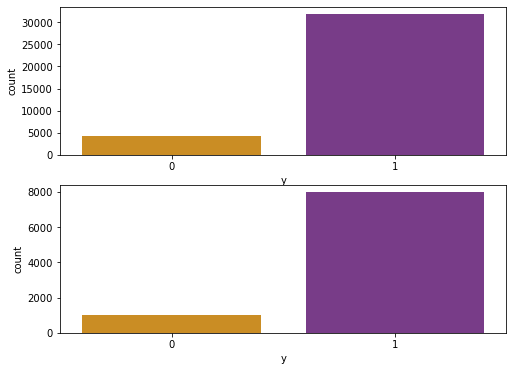

In [22]:
print('\033[7m Distribution of FD Status "Yes" and "NO" on Train, Test and Validation Data \033[0m')

fig,ax = plt.subplots(2,1,figsize = (8,6))

sns.countplot(x = y_train, palette='CMRmap_r', ax=ax[0])# Verifying the distribution of Train Test Validatin split
sns.countplot(x = y_test, palette='CMRmap_r', ax=ax[1]) 

plt.show()

We don't observe any bias in our spilt.

## Create Regression model

LogisticRegression is an ready made algorithm from SKlearn Library, We first initiate the model by passing the relevant parameters and them train the model by passing Train data.

**`Logistic Regression algorithm Parameters: `**

    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
    
WE are using parameters

* Random State : - to make sure we get same result every time we run the algorithm
* Class_weight : - As the data is imbalanced 
* max_iter     : - As it takes longer to converge due to large dataset

In [23]:
logi_reg = LogisticRegression(random_state=0,class_weight='balanced',max_iter=10000)
logi_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=0)

### Getting Probabilities, Predictions and Coefs from logistic regression model

In [34]:
logi_reg.predict(X_train)
y_pred = logi_reg.predict(X_train)

pred_proba = logi_reg.predict_proba(X_train)

print('\n \033[7m probabilities for 0th class and 1th class \033[0m \n')
print(pred_proba)
print('\n\n \033[7m Coefficients for Logistic model \033[0m \n')
logi_reg.coef_


  probabilities for 0th class and 1th class  

[[0.01450698 0.98549302]
 [0.06808414 0.93191586]
 [0.94306356 0.05693644]
 ...
 [0.00962376 0.99037624]
 [0.08075409 0.91924591]
 [0.04352354 0.95647646]]

  Coefficients for Logistic model  



array([[ 2.57271727e-03, -2.67854563e-05, -2.50073680e-03,
        -5.87791711e-03,  9.08457111e-02,  1.51463027e-03,
        -6.52787062e-04, -2.29925316e-01,  2.43849251e-01,
         2.88807051e-01,  1.20107671e-02, -5.85541276e-01,
         2.57430939e-01, -6.23215716e-01, -3.63386855e-02,
         6.83419813e-03,  6.35708165e-02,  1.17519552e-01,
         3.45211980e-01, -2.73978352e-02, -1.67530894e-01,
        -3.81276733e-01, -1.49212851e-01,  6.49097860e-02,
        -1.08887752e-01,  5.44221449e-01, -7.82358438e-02,
         5.13569541e-01, -4.39867751e-01, -4.11485702e-01,
         1.28668715e+00, -1.14480534e-01,  9.97450220e-01,
        -3.51570447e-01,  1.02906588e-01,  1.00837764e+00,
         1.15524599e+00, -3.41312627e-01, -1.51567039e+00,
         6.17433725e-01,  1.02653557e+00, -1.26063299e+00,
        -8.88949051e-01,  5.93636123e-01, -2.08152161e+00,
         1.10580969e+00]])

### Checking the accuracy of the model


 		 Accuracy Score  

The Training Accuracy is:  0.8440610484406105
The Testing Accuracy is :  0.837996240185779


 		 Classification Report  

              precision    recall  f1-score   support

           0       0.42      0.82      0.55      4260
           1       0.97      0.85      0.91     31908

    accuracy                           0.84     36168
   macro avg       0.70      0.84      0.73     36168
weighted avg       0.91      0.84      0.86     36168



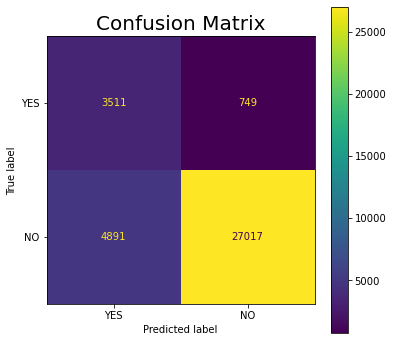


   Category Value counts for in "y_train" 


1    31908
0     4260
Name: y, dtype: int64

In [25]:
print('\n \t\t\033[7m Accuracy Score \033[0m \n')
# Accuracy on Train
print("The Training Accuracy is: ", logi_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is : ", logi_reg.score(X_test, y_test))

from sklearn.metrics import classification_report
print('\n\n \t\t\033[7m Classification Report \033[0m \n')
print(classification_report(y_train,y_pred))

from sklearn.metrics import confusion_matrix, plot_confusion_matrix ## CONFUSION METRICS
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(logi_reg,X_train,y_train,display_labels = ['YES', 'NO'],cmap='viridis',ax=ax)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

print('\n \033[7m  Category Value counts for in "y_train" \033[0m')
y_train.value_counts()

### PRECISION, SPECIFICITY AND RECALL/SENSITIVITY 

In [26]:
# precision = TP/TP+FP (accuracy of positive predictions out of total predicted positivies - prositive predictive value)
precision = 3141/(3141+4406)
# recall / sensitivity = TP/TP+FN (accuracy of positive prediction out of total actual positives - true positive rate)
recall = 3141 / (3141+664)
# specificity = TN /TN+FP (coverage of actual negetive sample meaning how many true negetives are correctly predicted)
specificity = 24340/(24340+4406)
print('\n \033[7m Precission, Recall, Specificity and False Positive Rate(FPR) \033[0m \n')
print(f'Precision\t-\t{precision:.2f}\nRecall\t\t-\t{recall:.2f}\nSpecificity\t-\t{specificity:.2f}')
# False positive rate is the rate of wrong positives predicted out of total actual negatives - inverse of specificity
print(F"FPR = ", 4406/(4406+24340),1-specificity)  


  Precission, Recall, Specificity and False Positive Rate(FPR)  

Precision	-	0.42
Recall		-	0.83
Specificity	-	0.85
FPR =  0.1532734989215891 0.15327349892158904


**We are interested in prediction TP as that is our classification problem we need to identify customers who took the FD correctly. Our model is correctly predicting the customer who have not taken the FD but its prdiction for customers who have taken the FD is as low as 0.19. Technically this is a useless model. By tweaking couple of parmeteres we could improve the recall by almost 60% now the correct prediction classification is at 84%.***

## ROC Curve

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
pred_proba = pd.DataFrame(pred_proba)
pred_proba

,0,1
0,0.014507,0.985493
1,0.068084,0.931916
2,0.943064,0.056936
3,0.404178,0.595822
4,0.147512,0.852488
...,...,...
36163,0.113899,0.886101
36164,0.061368,0.938632
36165,0.009624,0.990376
36166,0.080754,0.919246


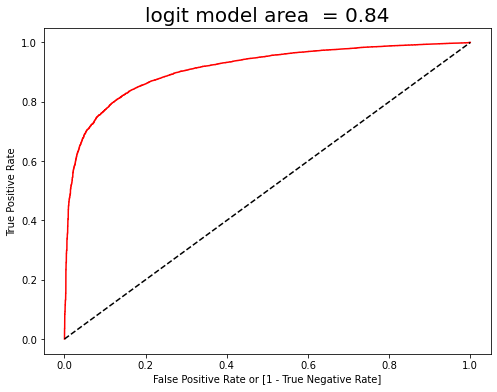

In [29]:
fpr,tpr,threshold = roc_curve(y_train, logi_reg.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label = f'logit model area  = {auc}',)
plt.title(f'logit model area  = {auc:.2f}',fontsize = 20)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Prediction on the test data

In [30]:
test_y_pred = logi_reg.predict(X_test)
test_pred_proba = logi_reg.predict_proba(X_test)


 		 Classification Report 

              precision    recall  f1-score   support

           0       0.40      0.80      0.53      1029
           1       0.97      0.84      0.90      8014

    accuracy                           0.84      9043
   macro avg       0.68      0.82      0.72      9043
weighted avg       0.91      0.84      0.86      9043


  Classification value counts on test data 

1    31908
0     4260
Name: y, dtype: int64


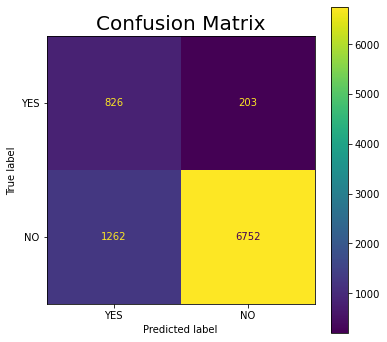

In [31]:
print('\n \t\t\033[7m Classification Report \033[0m\n')
print(classification_report(y_test, test_y_pred))

print('\n \033[7m Classification value counts on test data \033[0m\n')
print(y_train.value_counts())

fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_confusion_matrix(logi_reg,X_test,y_test,ax=ax,display_labels=['YES','NO'])
plt.title('Confusion Matrix', fontsize = 20)
plt.show()


 		 Classification Report 

              precision    recall  f1-score   support

           0       0.42      0.82      0.55      4260
           1       0.97      0.85      0.91     31908

    accuracy                           0.84     36168
   macro avg       0.70      0.84      0.73     36168
weighted avg       0.91      0.84      0.86     36168



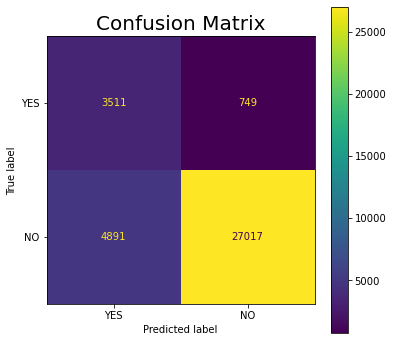

In [32]:
print('\n \t\t\033[7m Classification Report \033[0m\n')
print(classification_report(y_train, y_pred))

fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_confusion_matrix(logi_reg,X_train,y_train,ax=ax,display_labels=['YES','NO'])
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

## Conclusion 

* The Scores on Train and Test data are very close to each other which indicates the model is not over-fitting or under-fitting. The model is just about right. 

* The accuracy on train and test score are more or less same at 85% and 84% respectively. However, if we check the individual classes the scores vary.

* As we are more interested in class "0" (FD Status : 'NO'), the precision for this class is almost same for Train and Test data with 42% and 40% respectively. Even the deviation in recall is same (2%), with 82% and 79% respectively.

**Our model is performing reasonably well for given dataset.** 